# Re-code the house price machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [4]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

In [5]:
data = load_boston()

In [6]:
X, y = data["data"], data["target"]

In [7]:
X.shape, y.shape

((506, 13), (506,))

In [8]:
def draw_rm_and_price():
    return plt.scatter(X[:, 5], y)

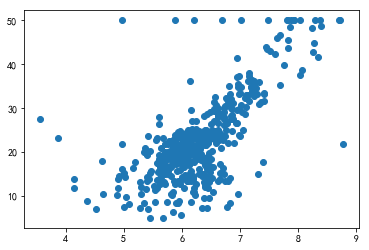

In [9]:
draw_rm_and_price()

In [10]:
def price(rm, k, b):
    return k * rm + b

In [11]:
X_rm = X[:, 5]
k = np.random.randint(-100, 100)
b = np.random.randint(-100, 100)

In [12]:
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

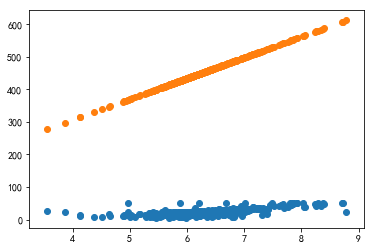

In [27]:
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

- 选择如下损失函数
$$Loss = \frac{1}{2n}\sum(y_i - \hat{y_i})^2$$

In [13]:
def mean_squared_error(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / (2 * y.size)  # 分母记得加括号

## Random Choose Method to get optimal *k* and *b*

In [54]:
trying_times = 2000

In [59]:
min_loss = float("inf")
best_k = best_b = None

for i in range(trying_times):
    k = np.random.random() * 200 - 100
    b = np.random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = mean_squared_error(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        
        print("When time is: {time}, get best_k: {k}, get best_b: {b}, and the loss is: {loss}".format(time=i, k=best_k, b=best_b, loss=min_loss))

When time is: 0, get best_k: -55.000926219242665, get best_b: -10.116913955416564, and the loss is: 72593.48333234958
When time is: 1, get best_k: -41.90315450469488, get best_b: -89.09586607320041, and the loss is: 70965.68729090707
When time is: 2, get best_k: -10.002055760430721, get best_b: 52.66992254238258, and the loss is: 647.0790071259755
When time is: 33, get best_k: 13.338572073721508, get best_b: -87.7289503745246, and the loss is: 375.5920874430535
When time is: 43, get best_k: 6.778511157894471, get best_b: 1.0249086117651416, and the loss is: 245.57851594834213
When time is: 56, get best_k: 9.621158241357207, get best_b: -50.498451815294864, and the loss is: 100.81626211133846
When time is: 216, get best_k: 17.582524527068628, get best_b: -97.57803084002413, and the loss is: 85.70357821640042
When time is: 223, get best_k: 6.580800227185549, get best_b: -10.117634737308705, and the loss is: 61.27643146993331
When time is: 261, get best_k: 0.5466297601759607, get best_b: 

In [60]:
k = 8.364685056463927
b = -29.079869781987355
price_best_by_random_k_and_b = [price(r, k, b) for r in X_rm]

Text(0.5,1,'上述最优的price和真实的price对比散点图')

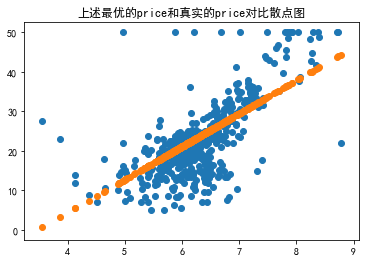

In [61]:
plt.scatter(X_rm, y)
plt.scatter(X_rm, price_best_by_random_k_and_b)
plt.title("上述最优的price和真实的price对比散点图")

## Supervised Direction to get optimal *k* and *b*

In [14]:
import random

In [15]:
min_loss = float("inf")
trying_times = 2000

In [65]:
best_k = np.random.random() * 200 - 100
best_b = np.random.random() * 200 - 100

In [66]:
direction = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)
]

In [67]:
next_direction = random.choice(direction)

In [68]:
scalar = 0.1

In [69]:
for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + scalar * k_direction, best_b + scalar * b_direction
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = mean_squared_error(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        best_k, best_b = current_k, current_b
        min_loss = current_loss
        if i % 100 == 0:
            print("When time is: {time}, get best_k: {k}, get best_b: {b}, and the loss is: {loss}".format(time=i, k=best_k, b=best_b, loss=min_loss))
    else:
        next_direction = random.choice(direction)

When time is: 0, get best_k: -97.55852142982836, get best_b: -30.0147752219602, and the loss is: 224380.79535512518
When time is: 100, get best_k: -87.65852142982892, get best_b: -39.91477522196034, and the loss is: 190426.96545478294
When time is: 200, get best_k: -77.65852142982949, get best_b: -49.91477522196048, and the loss is: 158957.96313014784
When time is: 300, get best_k: -67.65852142983006, get best_b: -59.914775221960625, and the loss is: 130330.96638792343
When time is: 400, get best_k: -57.658521429830174, get best_b: -69.91477522196034, and the loss is: 104545.9752281084
When time is: 500, get best_k: -47.65852142983003, get best_b: -79.91477522195977, and the loss is: 81602.98965070337
When time is: 600, get best_k: -37.65852142982989, get best_b: -89.9147752219592, and the loss is: 61502.00965570964
When time is: 700, get best_k: -27.658521429829747, get best_b: -99.91477522195864, and the loss is: 44243.03524312711
When time is: 800, get best_k: -17.658521429829605, g

In [70]:
k = 28.041478570170508
b = -155.2147752219555
price_best_by_supervised_direction_k_and_b = [price(r, k, b) for r in X_rm]

Text(0.5,1,'上述最优的price和真实的price对比散点图')

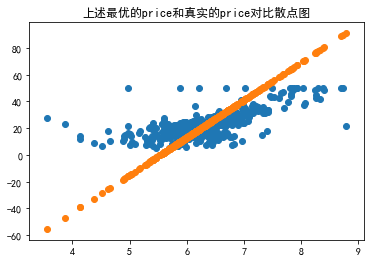

In [71]:
plt.scatter(X_rm, y)
plt.scatter(X_rm, price_best_by_supervised_direction_k_and_b)
plt.title("上述最优的price和真实的price对比散点图")

## Gradient Descent to get optimal *k* and *b*

- 此前我们选择了如下损失函数
$$Loss = \frac{1}{2n}\sum(y_i - \hat{y_i})^2$$

- 对$\hat{y_i}$进行求导
$$\frac{\partial{L}}{\partial{\hat{y_i}}}=\hat{y_i} - y_i$$

- 对$k和b$求偏导
$$\frac{\partial L}{\partial k}=\frac{1}{n}\sum\frac{\partial L}{\partial\hat{y_i}}*\frac{\partial\hat{y_i}}{\partial k}=\frac{1}{n}\sum{(\hat{y_i}-y_i)}x$$
$$\frac{\partial L}{\partial b}=\frac{1}{n}\sum\frac{\partial L}{\partial\hat{y_i}}=\frac{1}{n}\sum{(\hat{y_i}-y_i)}$$

In [76]:
def train_by_gradient_descend(it, lr):
    """
    it: iteration times
    lr: learning rate
    """
    k = random.random()
    b = random.random()
    
    for i in range(it):
        y_hat = np.array([price(r, k, b) for r in X_rm])
        if i % 100 == 0:
            print("When time is: {time}, get current k: {k}, current b: {b}, and the loss is: {loss}".format(time=i, k=k, b=b, loss=mean_squared_error(y, y_hat)))
        grad_y_hat = y_hat - y
        grad_k = (grad_y_hat * X_rm).sum() / X_rm.size
        grad_b = grad_y_hat.sum() / y.size
        
        k -= lr * grad_k
        b -= lr * grad_b
        
    return k, b  # 返回最佳的k和b

In [77]:
k, b = train_by_gradient_descend(it=10000, lr=0.03)

When time is: 0, get current k: 0.6269813471817064, current b: 0.572059661971354, and the loss is: 201.8622540888463
When time is: 100, get current k: 3.6898269448836425, current b: -0.24245604188550077, and the loss is: 29.10216400912779
When time is: 200, get current k: 3.8816074530698725, current b: -1.4623944864144698, and the loss is: 28.59385737979302
When time is: 300, get current k: 4.066592350259945, current b: -2.6391052474489975, and the loss is: 28.1209355201307
When time is: 400, get current k: 4.245022434276577, current b: -3.7741200683558724, and the loss is: 27.68093518875761
When time is: 500, get current k: 4.4171299704365135, current b: -4.86891641622446, and the loss is: 27.271564618011084
When time is: 600, get current k: 4.58313899389403, current b: -5.924919405109419, and the loss is: 26.890691577142388
When time is: 700, get current k: 4.743265601271107, current b: -6.943503651124669, and the loss is: 26.53633226646686
When time is: 800, get current k: 4.8977182

When time is: 0, get current k: 0.4011542116990612, current b: 0.5641204249190361, and the loss is: 229.5545708910738
When time is: 100, get current k: 3.520430856183183, current b: 0.8350924664961105, and the loss is: 29.56639258629181
When time is: 200, get current k: 3.5538871643324645, current b: 0.6222729444105141, and the loss is: 29.473572149842248
When time is: 300, get current k: 3.587142936655717, current b: 0.4107290521592616, and the loss is: 29.381861100974028
When time is: 400, get current k: 3.6201993754935176, current b: 0.20045314373225318, and the loss is: 29.291246180313916
When time is: 500, get current k: 3.6530576756411035, current b: -0.008562381104020477, and the loss is: 29.201714286964428
When time is: 600, get current k: 3.6857190247321694, current b: -0.21632507702763723, and the loss is: 29.113252476609727
When time is: 700, get current k: 3.71818460328179, current b: -0.42284245343430155, and the loss is: 29.025847959644082
When time is: 800, get current k

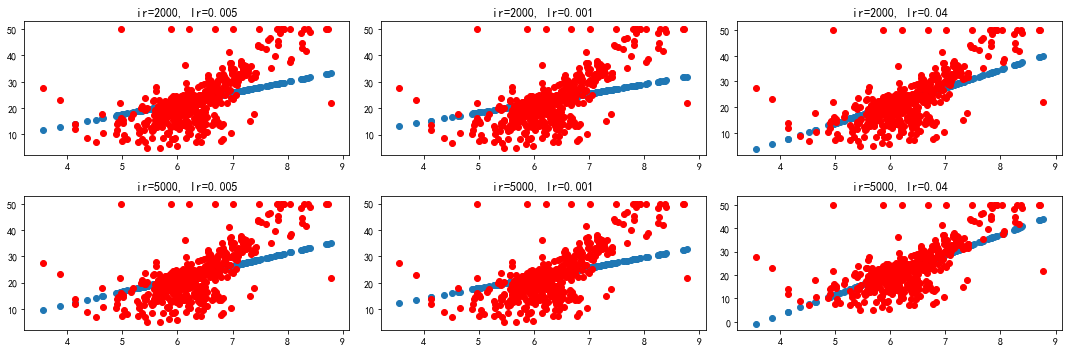

In [78]:
params = [(it, lr) for it in [2000, 5000] for lr in [0.005, 0.001, 0.04]]
fig, axes = plt.subplots(2, 3, figsize=(15, 5))  # 多图显示

for axe, (it, lr) in zip(axes.flatten(), params):
    k, b = train_by_gradient_descend(it, lr)
    title = "ir={it}, lr={lr}".format(it=it, lr=lr)
    axe.set_title(title)
    axe.scatter(X_rm, [price(r, k, b) for r in X_rm])
    axe.scatter(X_rm, y, color="red")
fig.tight_layout()  # tight_layout会自动调整子图参数，使之填充整个图像区域

## Try different Loss function and learning rate. 

- For example, you can change the loss function: $Loss = \frac{1}{n} \sum({y_i - \hat{y_i}})^2$ $to$ $Loss = \frac{1}{n} \sum(|{y_i - \hat{y_i}}|)$. And you can change the learning rate and observe the performance.

In [17]:
def mean_absolute_error(y, y_hat):
    return np.abs(y_hat - y).sum() / y.size

In [18]:
def supervised_direction(scalar, loss_func):
    min_loss = float("inf")
    trying_times = 2000
    
    best_k = np.random.random() * 200 - 100
    best_b = np.random.random() * 200 - 100
    
    direction = [
        (+1, -1),
        (+1, +1),
        (-1, -1),
        (-1, +1)
    ]
    
    next_direction = random.choice(direction)
    
    for i in range(trying_times):
        k_direction, b_direction = next_direction
        current_k, current_b = best_k + scalar * k_direction, best_b + scalar * b_direction
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss_func(y, price_by_k_and_b)
        
        if current_loss < min_loss:
            best_k, best_b = current_k, current_b
            min_loss = current_loss
            
            if i % 100 == 0:
                print("When time is: {time}, get best_k: {k} best_b: {b}, and the loss is: {loss}".format(time=i, k=best_k, b=best_b, loss=min_loss))
        else:
            next_direction = random.choice(direction)
    return best_k, best_b

When time is: 0, get best_k: 43.408858418450514 best_b: 84.26129653580546, and the loss is: 56269.340566670944
When time is: 100, get best_k: 42.91385841845026 best_b: 84.756296535805, and the loss is: 55389.34139810535
When time is: 200, get best_k: 42.413858418450005 best_b: 85.25629653580455, and the loss is: 54507.522837935416
When time is: 300, get best_k: 41.91385841844975 best_b: 85.7562965358041, and the loss is: 53632.80929172161
When time is: 400, get best_k: 41.41385841844949 best_b: 86.25629653580364, and the loss is: 52765.20075946374
When time is: 500, get best_k: 40.91385841844924 best_b: 86.75629653580319, and the loss is: 51904.69724116202
When time is: 600, get best_k: 40.41385841844898 best_b: 87.25629653580273, and the loss is: 51051.298736816156
When time is: 700, get best_k: 39.913858418448726 best_b: 87.75629653580228, and the loss is: 50205.005246426445
When time is: 800, get best_k: 39.41385841844847 best_b: 88.25629653580182, and the loss is: 49365.81676999281

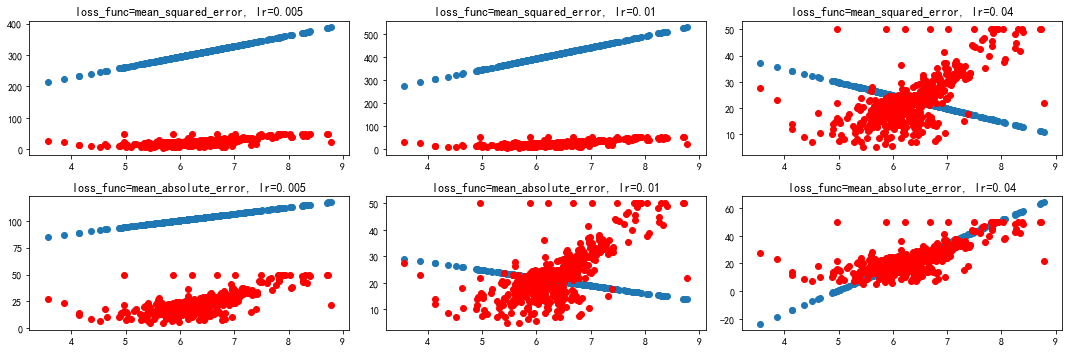

In [19]:
params = [(loss, lr) for loss in [mean_squared_error, mean_absolute_error] for lr in [0.005, 0.01, 0.04]]
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

for axe, (loss, lr) in zip(axes.flatten(), params):
    k, b = supervised_direction(lr, loss)  # 函数的返回值就是k, b
    title = "loss_func={loss_func}, lr={lr}".format(loss_func=loss.__name__, lr=lr)  # 如果不加__name__，则返回的就是<function mean_squared_error at 0x0000016C23D08AE8>
    axe.set_title(title)
    axe.scatter(X_rm, [price(r, k, b) for r in X_rm])
    axe.scatter(X_rm, y, color="red")
fig.tight_layout()

# Answer following questions:


## Why do we need machine learning methods instead of creating a complicated formula ?


- 复杂的公式会随着数据的改变需要我们人为地进行修改，而且当关系复杂到一定程度时，我们很难通过观察找到其中的关系。
- 机器学习方法基于数据驱动，它会随着数据的改变而自发学得对应的复杂关系。

## Wha't's the disadvantages of the 1st Random Choosen methods in our course ? 

- 毫无方向性。如果搜索次数不够多，随机值范围不好，很难得到好结果。

## Is the 2nd method supervised direction better than 1st one?  What's the disadvantages of the 2nd supversied directin method ? 

- 比第一种方法更好。因为它有一定的方向性，当参数向损失更小的方向更新时，则继续保持这个正确的方向，否则随机给出一个方向。
- 第二种方法的缺点是只有4个方向，极有可能无法选择到最好的方向。

## Why do we use Derivative / Gredient to fit a target function ? 

- 负梯度方向是函数下降最快的方向。

## In the words 'Gredient Descent', what's the Gredient and what's the Descent ?

- 梯度是损失函数对参数的偏导数，下降代表了按照梯度的负方向。

## What's the advantages of the 3rd gradient descent method compared to the previous methods ?

- 这种方法有了明确的方向，并且每一次都朝着损失函数变小的方向更新。

## Using the simple words to describe: What's the machine leanring.

- 输入$x、y$以及学习方法后，输出$x与y$之间的对应关系。

# Finish the search problem

## Beijing Subway System

- Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

<img src="timg.jpg", width=800, height=800>

### Dataflow

#### Get data from Webpage.

> a.	Get web page source from: [baike](https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485)

> b.	You may need @package [requests](https://2.python-requests.org/en/master/) page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package [beautiful soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

#### Preprocessing data from page source

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

### Build the search agent


> Build the search agent based on the graph we build.

> For example, when you run: **search('奥体中心', '天安门')**

> You need get the result: **奥体中心 -> A -> B -> C -> ... -> 天安门**

## Shanghai Subway System

### Dataflow

- 从上海地铁百度百科爬取数据

<img src="正则表达式2.png">

#### Get data from Webpage

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re

In [2]:
sh_metro_url = "https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin"
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
    'connection': 'keep-alive',
    'host': 'baike.baidu.com',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'upgrade-insecure-requests': '1'
}

In [3]:
# 获取页面数据
page = requests.get(sh_metro_url, headers=headers)

ConnectionError: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))

In [ ]:
content = page.content.decode("utf-8")  # content包含要匹配的链接

In [ ]:
page.status_code  # 返回http协议的状态码，200表示服务器已成功处理请求

#### Preprocessing data from page source

In [140]:
# soup = bs(content)

In [13]:
# 匹配正则表达式，打开要爬取的网址，查看网页源码，搜索要爬取的信息，找到类似如下关键句
# <a target=_blank href="/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF/12092650" data-lemmaid="12092650">上海地铁1号线</a>
# ()是为了提取匹配的字符串，表达式中有几个()就有几个相应的匹配字符串
# []是定义匹配的字符范围
line_pattern = re.compile(pattern=r'<a target=_blank href="(/item/[\d\w%]+/\d+)" data-lemmaid="\d+">(上海[\w\d]+线)</a>')

In [14]:
all_lines = {}  # 空字典

In [15]:
for link, line in line_pattern.findall(content):
    if line in all_lines:
        continue
    all_lines[line] = "https://baike.baidu.com" + link

In [16]:
all_lines

{'上海地铁10号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF/12419281',
 '上海地铁11号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8111%E5%8F%B7%E7%BA%BF/22948326',
 '上海地铁12号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8112%E5%8F%B7%E7%BA%BF/12062373',
 '上海地铁13号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF/22948511',
 '上海地铁16号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF/12025028',
 '上海地铁17号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8117%E5%8F%B7%E7%BA%BF/22948512',
 '上海地铁1号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF/12092650',
 '上海地铁2号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF/22947836',
 '上海地铁3号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF/22947837',
 '上海地铁4

In [17]:
first_line = requests.get(all_lines["上海地铁5号线"], headers=headers)

In [18]:
first_line.status_code  # 200表示页面响应需求

200

In [19]:
c = first_line.content.decode("utf-8")

In [20]:
soup = bs(c)

C:\Users\JeremySun\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\JeremySun\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [21]:
station_pattern = re.compile(r'<td.+>([\w\d]+站)')

In [22]:
def get_stations(soup):
    stations = []
    for h3 in soup.find_all("h3"):
        if h3.contents[-1] != "车站列表":
            continue
        par = h3.parent
        for sib in par.next_siblings:
            if sib.name == "table":
                for s in sib.children:
                    if s.contents:
                        stat = str(s.contents[0])
                        mat = station_pattern.search(stat)
                        if mat and len(mat.group(1)) < 10 and mat.group(1) != "车站":
                            stations.append(mat.group(1))
                return stations

In [23]:
get_stations(soup=soup)  # 提取出站点

['莘庄站',
 '春申路站',
 '银都路站',
 '颛桥站',
 '北桥站',
 '剑川路站',
 '东川路站',
 '江川路站',
 '西渡站',
 '萧塘站',
 '奉浦大道站',
 '环城东路站',
 '望园路站',
 '金海湖站',
 '奉贤新城站',
 '金平路站',
 '华宁路站',
 '文井路站',
 '闵行开发区站']

In [24]:
from collections import defaultdict

In [25]:
def get_all_stations(lines):
    all_stations = defaultdict(list)
    for line, url in lines.items():
        resp = requests.get(url, headers=headers)
        contents = resp.content.decode("utf-8")
        soup = bs(contents)
        stations = get_stations(soup)
        all_stations[line].extend(stations)
    return all_stations

In [26]:
all_stations = get_all_stations(all_lines)

C:\Users\JeremySun\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\JeremySun\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [27]:
all_stations

defaultdict(list,
            {'上海地铁10号线': ['航中路站',
              '紫藤路站',
              '龙柏新村站',
              '虹桥火车站站',
              '虹桥2号航站楼站',
              '虹桥1号航站楼站',
              '上海动物园站',
              '龙溪路站',
              '水城路站',
              '伊犁路站',
              '宋园路站',
              '虹桥路站',
              '交通大学站',
              '上海图书馆站',
              '陕西南路站',
              '新天地站',
              '老西门站',
              '豫园站',
              '南京东路站',
              '天潼路站',
              '四川北路站',
              '海伦路站',
              '邮电新村站',
              '四平路站',
              '同济大学站',
              '国权路站',
              '五角场站',
              '江湾体育场站',
              '三门路站',
              '殷高东路站',
              '新江湾城站'],
             '上海地铁11号线': ['花桥站',
              '光明路站',
              '兆丰路站',
              '安亭站',
              '上海汽车城站',
              '昌吉东路站',
              '上海赛车场站',
              '嘉定北站',
              '嘉定西站',
              '白银路站',
              '嘉定新城站',
     

In [28]:
for line, stations in all_stations.items():
    print("{line}一共有{stations}个站".format(line=line, stations=len(stations)))

上海地铁3号线一共有29个站
上海地铁17号线一共有13个站
上海地铁1号线一共有28个站
上海地铁12号线一共有32个站
上海地铁6号线一共有28个站
上海地铁16号线一共有13个站
上海地铁4号线一共有27个站
上海地铁10号线一共有31个站
上海地铁7号线一共有33个站
上海地铁11号线一共有39个站
上海地铁13号线一共有31个站
上海地铁2号线一共有30个站
上海地铁9号线一共有35个站
上海地铁5号线一共有19个站
上海磁浮列车示范运营线一共有2个站
上海地铁浦江线一共有6个站
上海地铁8号线一共有30个站


- **说明**
    - 4号线为环线
    - 11号站陈翔路站尚未开通

In [29]:
all_stations["上海地铁5号线"]

['莘庄站',
 '春申路站',
 '银都路站',
 '颛桥站',
 '北桥站',
 '剑川路站',
 '东川路站',
 '江川路站',
 '西渡站',
 '萧塘站',
 '奉浦大道站',
 '环城东路站',
 '望园路站',
 '金海湖站',
 '奉贤新城站',
 '金平路站',
 '华宁路站',
 '文井路站',
 '闵行开发区站']

In [30]:
# all_stations["上海地铁4号线"].pop()
all_stations["上海地铁4号线"]

['宜山路站',
 '上海体育馆站',
 '上海体育场站',
 '东安路站',
 '大木桥路站',
 '鲁班路站',
 '西藏南路站',
 '南浦大桥站',
 '塘桥站',
 '蓝村路站',
 '浦电路站',
 '世纪大道站',
 '浦东大道站',
 '杨树浦路站',
 '大连路站',
 '临平路站',
 '海伦路站',
 '宝山路站',
 '上海火车站站',
 '中潭路站',
 '镇坪路站',
 '曹杨路站',
 '金沙江路站',
 '中山公园站',
 '延安西路站',
 '虹桥路站',
 '宜山路站']

In [31]:
# all_stations["上海地铁11号线"].remove("陈翔路站")
all_stations["上海地铁11号线"]

['花桥站',
 '光明路站',
 '兆丰路站',
 '安亭站',
 '上海汽车城站',
 '昌吉东路站',
 '上海赛车场站',
 '嘉定北站',
 '嘉定西站',
 '白银路站',
 '嘉定新城站',
 '马陆站',
 '陈翔路站',
 '南翔站',
 '桃浦新村站',
 '武威路站',
 '祁连山路站',
 '李子园站',
 '上海西站站',
 '真如站',
 '枫桥路站',
 '曹杨路站',
 '隆德路站',
 '江苏路站',
 '交通大学站',
 '徐家汇站',
 '上海游泳馆站',
 '龙华站',
 '云锦路站',
 '龙耀路站',
 '东方体育中心站',
 '三林站',
 '三林东站',
 '浦三路站',
 '御桥站',
 '罗山路站',
 '秀沿路站',
 '康新公路站',
 '迪士尼站']

- 处理支线

In [32]:
# 处理5号线支线
all_stations["上海地铁5号线主线"] = all_stations["上海地铁5号线"][:15]
all_stations["上海地铁5号线支线"] = all_stations["上海地铁5号线"][15:]
all_stations.pop("上海地铁5号线")

['莘庄站',
 '春申路站',
 '银都路站',
 '颛桥站',
 '北桥站',
 '剑川路站',
 '东川路站',
 '江川路站',
 '西渡站',
 '萧塘站',
 '奉浦大道站',
 '环城东路站',
 '望园路站',
 '金海湖站',
 '奉贤新城站',
 '金平路站',
 '华宁路站',
 '文井路站',
 '闵行开发区站']

In [33]:
# 处理10号线支线
all_stations["上海地铁10号线主线"] = all_stations["上海地铁10号线"][3:]
all_stations["上海地铁10号线支线"] = all_stations["上海地铁10号线"][:3] + [all_stations["上海地铁10号线"][7]]
all_stations.pop("上海地铁10号线")

['航中路站',
 '紫藤路站',
 '龙柏新村站',
 '虹桥火车站站',
 '虹桥2号航站楼站',
 '虹桥1号航站楼站',
 '上海动物园站',
 '龙溪路站',
 '水城路站',
 '伊犁路站',
 '宋园路站',
 '虹桥路站',
 '交通大学站',
 '上海图书馆站',
 '陕西南路站',
 '新天地站',
 '老西门站',
 '豫园站',
 '南京东路站',
 '天潼路站',
 '四川北路站',
 '海伦路站',
 '邮电新村站',
 '四平路站',
 '同济大学站',
 '国权路站',
 '五角场站',
 '江湾体育场站',
 '三门路站',
 '殷高东路站',
 '新江湾城站']

In [34]:
# 处理11号线支线
all_stations["上海地铁11号线主线"] = all_stations["上海地铁11号线"][7:]
all_stations["上海地铁11号线支线"] = all_stations["上海地铁11号线"][:7] + [all_stations["上海地铁11号线"][10]]
all_stations.pop("上海地铁11号线")

['花桥站',
 '光明路站',
 '兆丰路站',
 '安亭站',
 '上海汽车城站',
 '昌吉东路站',
 '上海赛车场站',
 '嘉定北站',
 '嘉定西站',
 '白银路站',
 '嘉定新城站',
 '马陆站',
 '陈翔路站',
 '南翔站',
 '桃浦新村站',
 '武威路站',
 '祁连山路站',
 '李子园站',
 '上海西站站',
 '真如站',
 '枫桥路站',
 '曹杨路站',
 '隆德路站',
 '江苏路站',
 '交通大学站',
 '徐家汇站',
 '上海游泳馆站',
 '龙华站',
 '云锦路站',
 '龙耀路站',
 '东方体育中心站',
 '三林站',
 '三林东站',
 '浦三路站',
 '御桥站',
 '罗山路站',
 '秀沿路站',
 '康新公路站',
 '迪士尼站']

In [35]:
for line, stations in all_stations.items():
    print("{line}一共有{stations}个站".format(line=line, stations=len(stations)))

上海地铁1号线一共有28个站
上海地铁5号线主线一共有15个站
上海地铁6号线一共有28个站
上海地铁9号线一共有35个站
上海地铁7号线一共有33个站
上海地铁10号线主线一共有28个站
上海地铁13号线一共有31个站
上海地铁2号线一共有30个站
上海地铁10号线支线一共有4个站
上海地铁5号线支线一共有4个站
上海地铁浦江线一共有6个站
上海地铁8号线一共有30个站
上海地铁3号线一共有29个站
上海地铁17号线一共有13个站
上海地铁12号线一共有32个站
上海地铁16号线一共有13个站
上海地铁4号线一共有27个站
上海地铁11号线支线一共有8个站
上海地铁11号线主线一共有32个站
上海磁浮列车示范运营线一共有2个站


In [37]:
# 获取经纬度
long_lat_url = "http://service.shmetro.com/skin/js/pca.js"

In [38]:
resp = requests.get(url=long_lat_url, headers=headers)

In [39]:
resp.status_code

200

In [41]:
stations_long_lat = resp.content.decode("utf-8")

In [42]:
long_lat_pat = re.compile(r'var gis = \{(.*?)\}', re.S)
station_pat = re.compile(r'var stations = \{(.*?)\}', re.S)

In [50]:
long_lat = long_lat_pat.findall(stations_long_lat)
stations = station_pat.findall(stations_long_lat)

In [51]:
id_name_map = {}
for item in stations[0].split(","):
    id_, name = item.split(':')
    id_name_map[id_[1: -1]] = name[1: -1]
id_name_map

{'\n"0721': '美兰湖',
 '0111': '莘庄',
 '0112': '外环路',
 '0113': '莲花路',
 '0114': '锦江乐园',
 '0115': '上海南站',
 '0116': '漕宝路',
 '0117': '上海体育馆',
 '0118': '徐家汇',
 '0119': '衡山路',
 '0120': '常熟路',
 '0121': '陕西南路',
 '0122': '黄陂南路',
 '0123': '人民广场',
 '0124': '新闸路',
 '0125': '汉中路',
 '0126': '上海火车站',
 '0127': '中山北路',
 '0128': '延长路',
 '0129': '上海马戏城',
 '0130': '汶水路',
 '0131': '彭浦新村',
 '0132': '共康路',
 '0133': '通河新村',
 '0134': '呼兰路',
 '0135': '共富新村',
 '0136': '宝安公路',
 '0137': '友谊西路',
 '0138': '富锦路',
 '0234': '徐泾东',
 '0235': '虹桥火车站',
 '0236': '虹桥2号航站楼',
 '0237': '淞虹路',
 '0238': '北新泾',
 '0239': '威宁路',
 '0240': '娄山关路',
 '0241': '中山公园',
 '0242': '江苏路',
 '0243': '静安寺',
 '0244': '南京西路',
 '0245': '人民广场',
 '0246': '南京东路',
 '0247': '陆家嘴',
 '0248': '东昌路',
 '0249': '世纪大道',
 '0250': '上海科技馆',
 '0251': '世纪公园',
 '0252': '龙阳路',
 '0253': '张江高科',
 '0254': '金科路',
 '0255': '广兰路',
 '0256': '唐镇',
 '0257': '创新中路',
 '0258': '华夏东路',
 '0259': '川沙',
 '0260': '凌空路',
 '0261': '远东大道',
 '0262': '海天三路',
 '0263': '浦东国际机场',
 '0311': '上海南站',

In [61]:
lo_la_pat = re.compile(r'"(\d+)":"(\d+\.\d+),(\d+\.\d+)"')  # 双引号内不要加空格

In [62]:
id_long_lat_map = {}
for id_, long, lat in lo_la_pat.findall(long_lat[0]):
    id_long_lat_map[id_] = (float(long), float(lat))
id_long_lat_map

{'0111': (121.391832, 31.116809),
 '0112': (121.399814, 31.126929),
 '0113': (121.409334, 31.136734),
 '0114': (121.42068, 31.148312),
 '0115': (121.43627, 31.161142),
 '0116': (121.44187, 31.175383),
 '0117': (121.442801, 31.188348),
 '0118': (121.444749, 31.199152),
 '0119': (121.453247, 31.211777),
 '0120': (121.457719, 31.219937),
 '0121': (121.466688, 31.223492),
 '0122': (121.479798, 31.228753),
 '0123': (121.48085, 31.23868),
 '0124': (121.474802, 31.244699),
 '0125': (121.465, 31.247808),
 '0126': (121.462366, 31.253608),
 '0127': (121.465616, 31.265275),
 '0128': (121.461893, 31.27806),
 '0129': (121.458503, 31.285845),
 '0130': (121.456458, 31.29917),
 '0131': (121.455097, 31.312943),
 '0132': (121.453464, 31.325355),
 '0133': (121.447817, 31.337798),
 '0134': (121.444185, 31.345991),
 '0135': (121.440458, 31.361557),
 '0136': (121.437357, 31.376207),
 '0137': (121.434336, 31.38774),
 '0138': (121.43103, 31.398683),
 '0234': (121.307524, 31.195431),
 '0235': (121.32795, 31.19

In [63]:
len(id_name_map), len(id_long_lat_map)

(423, 313)

In [69]:
station_coordinates = defaultdict(tuple)
for id_, name in id_name_map.items():
    if id_ not in id_long_lat_map:
        continue
    station_coordinates[name + "站"] = id_long_lat_map[id_]

In [70]:
station_coordinates

defaultdict(tuple,
            {'七宝站': (121.356047, 31.161397),
             '三林东站': (121.529691, 31.152393),
             '三林站': (121.517551, 31.148698),
             '三门路站': (121.514701, 31.318613),
             '上南路站': (121.512956, 31.154788),
             '上大路站': (121.414775, 31.321458),
             '上海体育场站': (121.450248, 31.19218),
             '上海体育馆站': (121.443402, 31.188814),
             '上海儿童医学中心站': (121.52979, 31.209399),
             '上海动物园站': (121.373597, 31.196049),
             '上海南站站': (121.43627, 31.161142),
             '上海图书馆站': (121.450434, 31.213992),
             '上海大学站': (121.395296, 31.326259),
             '上海汽车城站': (121.18725, 31.291581),
             '上海游泳馆站': (121.448026, 31.185365),
             '上海火车站站': (121.464746, 31.255935),
             '上海科技馆站': (121.550621, 31.225524),
             '上海西站站': (121.410075, 31.268278),
             '上海赛车场站': (121.232625, 31.337944),
             '上海马戏城站': (121.458503, 31.285845),
             '世纪公园站': (121.557067, 31.2

In [67]:
# 舍弃没有经纬度的站
# defaultdict类的初始化函数接受一个类型作为参数，当所访问的键不存在的时候，可以实例化一个值作为默认值。这里是空list
station_connection_info = defaultdict(list)
station_line_map = defaultdict(list)
for line, stations in all_stations.items():
    for i in range(len(stations)):
        station_line_map[stations[i]].append(line)
        if stations[i] not in station_coordinates:
            continue
        if i > 0 and stations[i - 1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i - 1])
        if i < len(stations) - 1 and stations[i + 1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i + 1])            

In [68]:
station_connection_info

defaultdict(list,
            {'七宝站': ['星中路站', '中春路站'],
             '三林东站': ['三林站', '浦三路站'],
             '三林站': ['东方体育中心站', '三林东站'],
             '三门路站': ['江湾体育场站', '殷高东路站'],
             '上南路站': ['灵岩南路站', '华夏西路站'],
             '上大路站': ['南陈路站', '场中路站'],
             '上海体育场站': ['上海体育馆站', '东安路站'],
             '上海体育馆站': ['漕宝路站', '徐家汇站', '宜山路站', '上海体育场站'],
             '上海儿童医学中心站': ['临沂新村站', '蓝村路站'],
             '上海动物园站': ['虹桥1号航站楼站', '龙溪路站'],
             '上海南站站': ['锦江乐园站', '漕宝路站', '石龙路站'],
             '上海图书馆站': ['交通大学站', '陕西南路站'],
             '上海大学站': ['南陈路站'],
             '上海汽车城站': ['安亭站', '昌吉东路站'],
             '上海游泳馆站': ['徐家汇站', '龙华站'],
             '上海火车站站': ['汉中路站', '中山北路站', '中潭路站', '宝山路站', '宝山路站', '中潭路站'],
             '上海科技馆站': ['世纪公园站', '世纪大道站'],
             '上海西站站': ['李子园站', '真如站'],
             '上海赛车场站': ['昌吉东路站', '嘉定新城站'],
             '上海马戏城站': ['延长路站', '汶水路站'],
             '世纪公园站': ['龙阳路站', '上海科技馆站'],
             '世纪大道站': ['浦电路站',
              '源深体育中心站',
        

In [71]:
len(station_coordinates), len(station_connection_info)

(261, 257)

### Build the search agent

In [72]:
import math

In [73]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [74]:
def get_geo_distance(station1, station2):
    return geo_distance(station_coordinates[station1], station_coordinates[station2])

In [75]:
get_geo_distance('四平路站', '同济大学站')

0.6749695453122704

In [80]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

In [81]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [82]:
%matplotlib inline

In [83]:
station_graph = nx.Graph()

In [84]:
station_graph.add_nodes_from(list(station_coordinates.keys()))

C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\JeremySun\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\JeremySun\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


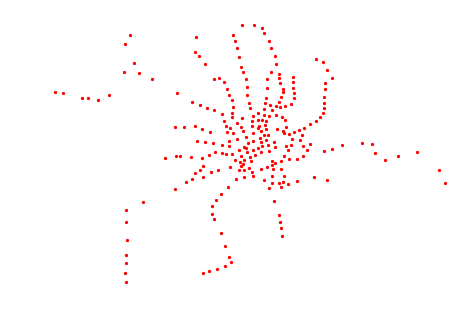

In [85]:
nx.draw(station_graph, station_coordinates, node_size=5)

In [86]:
station_with_road = nx.Graph(station_connection_info)

C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first cle

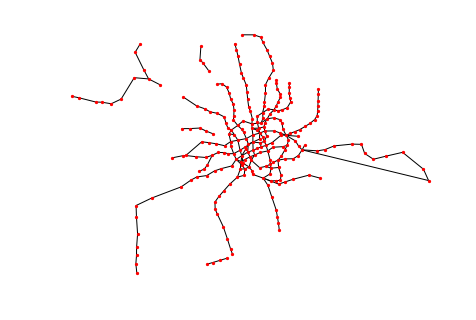

In [87]:
nx.draw(station_with_road, station_coordinates, node_size=5)

In [88]:
from collections import deque

In [89]:
def print_route(prev, start, destination):
    route = deque([destination])
    
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    
    print('🚈'.join(route))

In [ ]:
def search(start, destination, connection_graph):
    visited = {start}
    q = deque([start])
    prev = {}
    while q:
        station = q.popleft()
        for next_ in connection_graph[station]:
            if next_ in visited: continue
            prev[next_] = station
            if next_ == destination:
                print_route(prev, start, destination)
                return
            visited.add(next_)
            q.append(next_)
    print('无法到达！！！')

In [90]:
def search(start, destination, connection_graph):
    visited = {start}
    q = deque([start])
    prev = {}
    
    while q:
        station = q.popleft()
        for next_ in connection_graph[station]:
            if next_ in visited:
                continue
            prev[next_] = station
            if next_ == destination:
                print_route(prev, start, destination)
                return
            visited.add(next_)
            q.append(next_)
            
    print("无法到达该地！")

In [91]:
def search_bfs(start, destination, connection_graph):
    visited = set()
    routes = deque([[start]])
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('🚈'.join(new_route))
                return 
            routes.appendleft(new_route)
        visited.add(frontier)
        
    print('无法到达！！！')

In [92]:
def search_dfs(start, destination, connection_graph):
    visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('🚈'.join(new_route))
                return 
            routes.append(new_route)
        visited.add(frontier)
        
    print('无法到达！！！')

In [106]:
search("同济大学站", "交通大学站", station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈宝山路站🚈上海火车站站🚈汉中路站🚈南京西路站🚈静安寺站🚈江苏路站🚈交通大学站


In [104]:
search_bfs("同济大学站", "交通大学站", station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈宝山路站🚈上海火车站站🚈汉中路站🚈南京西路站🚈静安寺站🚈江苏路站🚈交通大学站


In [105]:
search_dfs("同济大学站", "交通大学站", station_connection_info)

同济大学站🚈四平路站🚈曲阳路站🚈虹口足球场站🚈东宝兴路站🚈宝山路站🚈上海火车站站🚈中潭路站🚈镇坪路站🚈曹杨路站🚈隆德路站🚈江苏路站🚈交通大学站


# （Optional）Create different policies for transfer system.


As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

In [107]:
import heapq

In [108]:
def get_route(prev, start, destination):
    route = deque([destination])
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    return route

In [109]:
def search_base_on_dijkstra(start, destination, connection_graph):
    """最短距离"""
    prev = {} # 记录上一站
    station_dist = {start: 0} # 记录某一站与起点的最近距离
    min_dist_heap = [[0, start]] # 小顶堆
    while min_dist_heap:
        dist, station = heapq.heappop(min_dist_heap) # 拿出当前距离起点最近的站点
        if station == destination:
            route = get_route(prev, start, destination)
            print('🚈'.join(route))
            return 
        for next_ in connection_graph[station]:
            tmp_dist = get_geo_distance(station, next_) + dist
            if next_ in station_dist and tmp_dist < station_dist[next_]: # 已经更新过则与原距离比较，更新则更新
                station_dist[next_] = tmp_dist
                prev[next_] = station
                for i in range(len(min_dist_heap)):
                    d, s = min_dist_heap[i]
                    if s == next_:
                        min_dist_heap[i][0] = tmp_dist
                        break
            elif next_ not in station_dist:
                heapq.heappush(min_dist_heap, [tmp_dist, next_])
                prev[next_] = station
                station_dist[next_] = tmp_dist
                
    print('无法到达！！！') 

In [110]:
search_base_on_dijkstra('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站🚈陆家浜路站🚈西藏南路站🚈中华艺术宫站🚈耀华路站🚈成山路站🚈杨思站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


In [111]:
def get_transfer(route):
    """换乘次数"""
    count = 0
    for i in range(1,len(route)-1):
        if len(station_connection_info[route[i]]) <= 2: 
            continue
        prev, after = station_line_map[route[i-1]], station_line_map[route[i+1]]
        # 主线支线不算换乘
        for j in range(len(prev)):
            if prev[j].endswith('主线') or prev[j].endswith('支线'):
                prev[j] = prev[j][:-2]
        for k in range(len(after)):
            if after[k].endswith('主线') or after[k].endswith('支线'):
                after[k] = after[k][:-2]
        if not set(prev) & set(after): count += 1
    return count

In [112]:
def get_distance(route):
    """距离"""
    distance = 0
    for i in range(1, len(route)):
        distance += get_geo_distance(route[i-1], route[i])
    return distance

In [113]:
def search_bfs(start, destination, connection_graph, strategy, by_way=[]):
#     visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in cur: 
                continue
            new_route = cur + [next_]
            if next_ == destination: 
                for s in by_way:
                    if s not in new_route:
                        break
                else:
                    print('🚈'.join(new_route))
                    return
            else:
                routes.append(new_route)
        routes.sort(key=strategy, reverse=True)
#         visited.add(frontier)
    print('无法到达！！！')

In [114]:
search_bfs('同济大学站', '老西门站', station_connection_info, get_distance, by_way=['曲阳路站'])

同济大学站🚈四平路站🚈曲阳路站🚈虹口足球场站🚈西藏北路站🚈中兴路站🚈曲阜路站🚈人民广场站🚈大世界站🚈老西门站


In [115]:
search_bfs('同济大学站', '老西门站', station_connection_info, get_distance)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站


In [116]:
search_bfs('同济大学站', '宝山路站', station_connection_info, get_transfer, by_way=['东宝兴路站'])

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站🚈新天地站🚈陕西南路站🚈南京西路站🚈人民广场站🚈曲阜路站🚈中兴路站🚈西藏北路站🚈虹口足球场站🚈东宝兴路站🚈宝山路站


In [117]:
search_bfs('同济大学站', '宝山路站', station_connection_info, get_transfer)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈宝山路站


## Test your result with commercial applications. 

- 将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因。
    - 和高德地图进行分析比较：
        1. 如果不使用 **by_way** 参数路程最短和最少换乘的结果基本与高德一致，但由于都是基于贪心并非全局最优，所以有时会不一样；
        2. 使用了 **by_way** 之后，由于不能去除已访问过的站点搜索空间大大增加，一定程度上放大了基于贪心的缺点，更大概率和高德地图不一致，且运行时间随着距离增大而大大增加。

**恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。可以说，我们现在通常见到的方法都能够归属到这几类方法中。这就是人工智能，并没有很难是吧？ 继续加油！**

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)